# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd

df = pd.read_csv("depression_data.tsv", delimiter="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [3]:
df["age"].value_counts()

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [4]:
# your code and output here
needed_df = df[(df["age"] >= 14) & (df["age"] <= 50)]
print(needed_df)

                                                    text  label   age
0      Когда-то я был добрым романтиком, который стре...      1  32.0
1      Здраствуйте! Я каждый день просыпаюсь с мыслью...      1  28.0
2      У меня проблемы с девушкой. Каждую ссору я не ...      1  16.0
3      Вся моя жизнь это один сплошной ад, в котором ...      1  32.0
4      Я хочу уснуть и не проснуться.каждый день одно...      1  14.0
...                                                  ...    ...   ...
24514  Я больше не могу держать в себе... Мне нужна п...      1  18.0
24515  Моя душа разрывается между желанием и долгом. ...      1  23.0
24516  Моя история началась еще давно и продолжается ...      1  23.0
24517  моя проблема заключается в том, что основой мо...      1  19.0
24518          Мне очень страшно..Смерть приближается...      1  19.0

[22797 rows x 3 columns]


2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [5]:
# your code and output here
diap_1 = df[(df["age"] >= 16) & (df["age"] <= 26)]
diap_2 = diap_1[diap_1["age"] == 16]
diap_3 = len(diap_2)/len(diap_1)

print(diap_3)

0.1259412780656304


3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [6]:
# your code and output here
new_dataset_1 = df[df["age"] == 28]
new_dataset_2 = df[df["age"] == 30]
print(len(new_dataset_1 + new_dataset_2))

1185


4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [7]:
# your code and output here
another_database = df[(df["age"] >= 18) & (df["age"] <= 30)]
another_database['age'].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [8]:
# your code and output here

df['label'].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [9]:
!pip install razdel

from razdel import sentenize, tokenize

sentez = []

for t in df['text']:
  sentez.append(len([_.text for _ in list(sentenize(t))]))

df['sentences'] = sentez
df

,text,label,age,sentences
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18
...,...,...,...,...
64034,Южная Корея будет внедрять свои технологии в К...,0,NaN,1
64035,В минувшие выходные в спортблоке КалмГУ прошли...,0,NaN,6
64036,ВТБ подвел итоги первого корпоративного акселе...,0,NaN,19
64037,ВТБ запустит бесплатное пополнение карт других...,0,NaN,6


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("russian")


2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [12]:
# your code and output here
from nltk.corpus import stopwords
def text_tokenizer(text):
  text = ' '.join([word for word in text.split() if word not in cachedStopWords])
  tokens = list(tokenize(text))
  return [_.text for _ in tokens]

text_tokenizer('Мама мыла раму')

['Мама', 'мыла', 'раму']

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [13]:
lengths_0 = []
lengths_1 = []
lengths_all = []

set_1 = df[df["label"] == 0]
set_2 = df[df["label"] == 1]

for text in df['text']:
  tokens = text_tokenizer(text)
  lengths_all.append(len(tokens))

for text in set_1['text']:
  tokens = text_tokenizer(text)
  lengths_0.append(len(tokens))

for text in set_2['text']:
  tokens = text_tokenizer(text)
  lengths_1.append(len(tokens))

mean_all = sum(lengths_all)/len(lengths_all)
mean_1 = sum(lengths_0)/len(lengths_0)
mean_2 = sum(lengths_1)/len(lengths_1)
# your code and output here

In [14]:
print(mean_all)
print(mean_1)
print(mean_2)

156.68622245818955
204.19643359045625
109.17155974764195


In [15]:
from tqdm import tqdm_notebook

4. Напишите функцию, которая переводит текст в последовательность лемм.

In [16]:
# your code and output here
!pip install pymorphy2
!pip install pymorphy2-dicts-ru
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [17]:
import re
def tokenize(text):
  text = re.sub('[!@#$%^&*\(\)\[\].,?"\']',' ', text)
  lemmies = []
  for word in text.split():
    p = morph.parse(word)[0]
    lemmies.append(p.normal_form)
  return ' '.join(lemmies)
tokenize('Мама мыла раму.')

'мама мыло рама'

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [18]:
# your code and output here
#morph.parse('Котейка')[0].tag.POS

def text_to_pos(text):
  text = re.sub('[!@#$%^&*\(\)\[\].,?"\']',' ', text)
  lemmies_pos = []
  for word in text.split():
    p = morph.parse(word)[0].tag.POS
    lemmies_pos.append(p)
  return ' '.join(lemmies_pos)

text_to_pos('Мама достала тарелку.')

'NOUN VERB NOUN'

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

В список стоп-слов можно добавить в первую очередь слова, которые не несут в себе никакого смысла и созданы в основном для того, чтобы приукрасить речь. Это не только местоимения, междометия, частицы и цифры (в числе других подобных частей речи), но и, допустим, расхожие фразы. Например, слова "товары" и "услуги" подразумевают сами товары или услуги, не говоря при этом, что конкретно доступно клиенту. Более правильным будет полное описание предоставляемых удобств. Также возможны случаи, когда говорящий/пишущий высказывает неопределённость в плане чего-либо (какие-то машины, разные вопросы и т.п). Тут лучше использовать более информативные выражения.

In [19]:
# your code and output here

### Часть 3: Визуализация (1 балл)

1. Визуализируйте распределение количество предложений / текст.

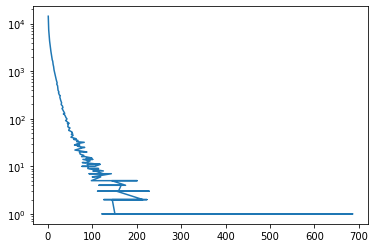

In [20]:
# your code and output here
df['sentences'].value_counts().plot(logy=True)

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

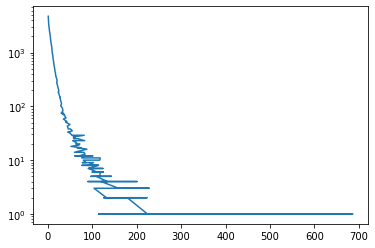

In [21]:
# your code and output here
set_1['sentences'].value_counts().plot(logy=True)

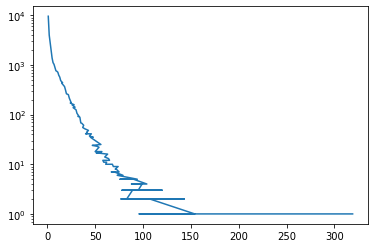

In [22]:
set_2['sentences'].value_counts().plot(logy=True)

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

Да, количество предложений в тексте более-менее коррелирует с возрастом автора в данной выборке (чем больше возраст, тем меньше текст), хотя время от времени наблюдаются резкие скачки назад. Как показывает график, корреляция является отрицательной.

Text(0.5, 1.0, 'Корреляция между количеством предложений в тексте и возрастом автора')

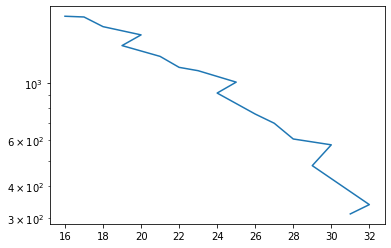

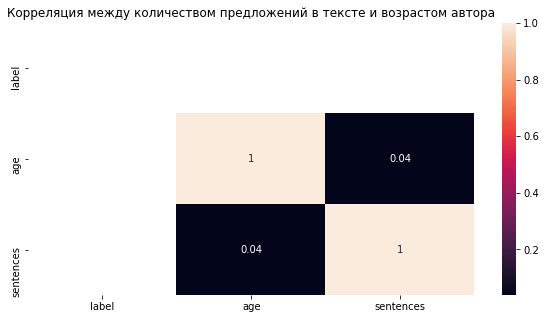

In [50]:
# your code and output here
import matplotlib.pyplot as plt

corr_database = df[(df["age"] >= 16) & (df["age"] <= 32)]

corr_database['age'].value_counts().plot(logy=True)

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(data=corr_database.corr(),annot=True,ax=ax)

plt.title("Корреляция между количеством предложений в тексте и возрастом автора")

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [26]:
# your code and output here
def char_ngrams(text, n):
  grams = []
  for i in range(len(text)):
    new = [text[i:i+n]]
    for newwie in new:
      if len(newwie) == n:
        grams.append(newwie)
  return grams

In [27]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [28]:
# your code and output here

def word_ngrams(text, n):
  text = text.split()
  return list(zip(*[text[i:] for i in range(n)]))

In [29]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

word_ngrams(text, n=3)

[('уставшая', 'мама', 'мыла'),
 ('мама', 'мыла', 'грязную'),
 ('мыла', 'грязную', 'раму')]

In [30]:
word_ngrams(text, n=4)

[('уставшая', 'мама', 'мыла', 'грязную'), ('мама', 'мыла', 'грязную', 'раму')]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [31]:
# your code and output here
def lemma_ngrams(text, n):
  text = text.split()
  lem_text = []
  for word in text:
    p = morph.parse(word)[0]
    lem_text.append(p.normal_form)
  return list(zip(*[lem_text[i:] for i in range(n)]))

text = "уставшая мама мыла грязную раму"

#lemma_ngrams(text, n=3)

In [32]:
# пример работы функции

lemma_ngrams(text, n=3)

[('устать', 'мама', 'мыло'),
 ('мама', 'мыло', 'грязный'),
 ('мыло', 'грязный', 'рама')]

In [33]:
lemma_ngrams(text, n=4)

[('устать', 'мама', 'мыло', 'грязный'), ('мама', 'мыло', 'грязный', 'рама')]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [34]:
# your code and output here
def pos_ngrams(text, n):
  text = text.split()
  pos_text = []
  for word in text:
    p = morph.parse(word)[0]
    pos_text.append(p.tag.POS)
  return list(zip(*[pos_text[i:] for i in range(n)]))

In [35]:
# пример работы функции

pos_ngrams(text, n=3)

[('PRTF', 'NOUN', 'NOUN'), ('NOUN', 'NOUN', 'ADJF'), ('NOUN', 'ADJF', 'NOUN')]

In [36]:
pos_ngrams(text, n=4)

[('PRTF', 'NOUN', 'NOUN', 'ADJF'), ('NOUN', 'NOUN', 'ADJF', 'NOUN')]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [37]:
# your code and output here
def build_pos_dict(texts):
  pos_dict = {}
  new_list = []
  texts = ' '.join(texts)
  for word in texts.split():
    p = morph.parse(word)[0]
    new_list.append(p.tag.POS)
  for a_word in new_list:
    try:
      pos_dict[a_word] += 1
    except:
      pos_dict[a_word] = 1
  return pos_dict


In [38]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [ ]:
# your code and output here
#dict_list_1 = []
#for p in set_1['text']:
#  poss = build_pos_dict(p)
#  dict_list_1.append(poss)
build_pos_dict(set_1['text'])

In [ ]:
build_pos_dict(set_2['text'])

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

Для решения подобного рода задач полезными могут быть категориальные признаки, ведь полученные тексты можно разбить на несколько подпунктов в зависимости от содержания/пола автора/сдержанности. Регулярные выражения помогут выявить те случаи, где тот или иной признак наиболее очевиден, и позволят выявить его значимость на фоне других факторов.

In [ ]:
# your answer text here